# Ejercicios

Esta sección incluye los ejercicios del libro.

## Ejercicio 1. La lotería para python

In [ ]:
import pandas as pd
import random

# Creación de la lista de cartas
cartas = ["La maceta", "El borracho", "La campana", "El catrin", "El violoncello", "La sandia", "La chalupa", "El gorrito", "El arpa", "El camaron", "El barril", "La dama", "La bota", "El pajaro", "El melon", "El cotorro", "La palma", "El mundo", "El apache", "El pescado", "La muerte", "El alacran", "El gallo", "La calavera"]
cartas.append("El diablito")
cartas.extend(["El valiente", "La corona", "El barril"])

# Mostrar las cartas
print(cartas)

# Crear un DataFrame con las cartas
deck_df = pd.DataFrame(cartas, columns=['Carta'])

# Función para crear una tabla de jugador
def crear_tabla(deck_df):
    tabla = deck_df.sample(16).reset_index(drop=True)
    tabla['Marcada'] = False
    return tabla

# Crear una tabla para un jugador y mostrarla
tabla_jugador = crear_tabla(deck_df)
print("Tabla del Jugador:")
print(tabla_jugador)

# Función para "cantar" una carta
def cantar_carta(deck_df):
    return deck_df.sample().iloc[0]['Carta']

# Cantar una carta y mostrarla
carta_cantada = cantar_carta(deck_df)
print("Carta Cantada:", carta_cantada)

# Función para marcar una carta en la tabla
def marcar_carta(tabla, carta_cantada):
    if carta_cantada in tabla['Carta'].values:
        tabla.loc[tabla['Carta'] == carta_cantada, 'Marcada'] = True
        print("¡Carta marcada!")
    else:
        print("Esta carta no está en tu tabla.")

# Marcar una carta y mostrar la tabla actualizada
marcar_carta(tabla_jugador, carta_cantada)
print(tabla_jugador)

# Función para verificar si hay un ganador
def verificar_ganador(tabla):
    return all(tabla['Marcada'])

# Verificar si hay un ganador
if verificar_ganador(tabla_jugador):
    print("¡Felicidades, has ganado!")
else:
    print("Sigue jugando.")


## Ejercicio 2. Sesgo de Selección.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind

# Crear un DataFrame inventado de ejemplo
np.random.seed(0)
n = 100  # número de observaciones
df = pd.DataFrame({
    'edad': np.random.randint(18, 22, size=n),
    'sexo': np.random.choice(['M', 'F'], size=n),
    'promedio_pre': np.random.uniform(6, 10, size=n),  # promedio antes del evento
    'tratamiento': np.random.choice([0, 1], size=n),  # 1 si asistieron a la fiesta, 0 si no
})

# Añadir una variable de resultado influenciada por el tratamiento y otras variables
df['resultado'] = df['promedio_pre'] + np.where(df['tratamiento'] == 1, -0.5, 0.5) + np.random.normal(0, 0.25, size=n)

# Propensity score matching
X = pd.get_dummies(df.drop(['tratamiento', 'resultado'], axis=1))  # Variables confusoras
y = df['tratamiento']  # Variable de tratamiento

# Ajustar un modelo logístico
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X, y)
propensity_scores = modelo_logistico.predict_proba(X)[:, 1]

# Añadir propensity score al DataFrame
df['propensity_score'] = propensity_scores

# Separar en grupos de tratamiento y control
tratados = df[df['tratamiento'] == 1]
control = df[df['tratamiento'] == 0]
emparejados = pd.concat([tratados, control]).sort_values('propensity_score')

# Análisis de resultados
tratados_resultados = emparejados[emparejados['tratamiento'] == 1]['resultado']
control_resultados = emparejados[emparejados['tratamiento'] == 0]['resultado']

# Test t para comparar las medias
t_stat, p_valor = ttest_ind(tratados_resultados, control_resultados)

t_stat, p_valor
# (-5.993753901826858, 3.4170361050226936e-08)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Creando gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot antes del emparejamiento
sns.boxplot(x='tratamiento', y='resultado', data=df, ax=ax[0])
ax[0].set_title('Distribución de Calificaciones Antes del Emparejamiento')
ax[0].set_xlabel('Tratamiento (Asistencia a la Fiesta)')
ax[0].set_ylabel('Calificaciones')

# Boxplot después del emparejamiento
sns.boxplot(x='tratamiento', y='resultado', data=emparejados, ax=ax[1])
ax[1].set_title('Distribución de Calificaciones Después del Emparejamiento')
ax[1].set_xlabel('Tratamiento (Asistencia a la Fiesta)')
ax[1].set_ylabel('Calificaciones')

plt.tight_layout()
plt.show()

## Ejercicio 3. Sesgo de Selección (2)

Escenario del Ejercicio: Estudio de Salud en una Empresa
Imagina que eres un científico de datos en una empresa y se te ha pedido realizar un estudio sobre la salud de los empleados. La empresa tiene empleados que trabajan en oficina y empleados que trabajan en campo. Quieres comparar su nivel de actividad física.

Tarea 1: Crear una Base de Datos de Empleados
Primero, vamos a simular una base de datos de empleados. Cada empleado tiene un ID, su tipo de trabajo (oficina o campo) y su nivel de actividad física (medido en pasos por día).

In [1]:
import pandas as pd
import random

# Crear una base de datos simulada
empleados = pd.DataFrame({
    'ID': range(1, 101),
    'Tipo_Trabajo': ['Oficina' if random.random() < 0.5 else 'Campo' for _ in range(100)],
    'Actividad_Fisica': [random.randint(3000, 7000) if random.random() < 0.5 else random.randint(7000, 12000) for _ in range(100)]
})

Tarea 2: Seleccionar Participantes para el Estudio
Ahora, seleccionaremos un grupo de empleados para el estudio. Aquí es donde introduciremos el sesgo de selección.

Selección Aleatoria: Seleccionar 30 empleados al azar.
Selección Sesgada: Seleccionar 30 empleados que trabajan en oficina.

In [ ]:
# Selección aleatoria
participantes_aleatorios = empleados.sample(30)

# Selección sesgada
participantes_sesgados = empleados[empleados['Tipo_Trabajo'] == 'Oficina'].sample(30)


Tarea 3: Análisis y Comparación
Finalmente, compararemos los resultados de los dos grupos para ver cómo el método de selección afecta las conclusiones del estudio.

In [ ]:
# Calcular el promedio de actividad física para cada grupo
promedio_aleatorio = participantes_aleatorios['Actividad_Fisica'].mean()
promedio_sesgado = participantes_sesgados['Actividad_Fisica'].mean()

print(f"Promedio de Actividad Física (Selección Aleatoria): {promedio_aleatorio}")
print(f"Promedio de Actividad Física (Selección Sesgada): {promedio_sesgado}")

Discusión
Puedes discutir con los estudiantes cómo la selección sesgada (solo empleados de oficina) podría llevar a conclusiones erróneas sobre la actividad física de todos los empleados de la empresa. Este ejercicio ayuda a entender la importancia de una selección adecuada de la muestra en estudios y encuestas para evitar sesgos.

## Ejercicio 4. Campaña de Marketing en una Empresa
Imagina que eres un analista de datos en una empresa que recientemente ha lanzado una campaña de marketing para aumentar las ventas. La empresa quiere saber si la campaña ha sido efectiva.

Tarea 1: Crear una Base de Datos Simulada
Primero, vamos a simular una base de datos de ventas semanales antes y después de la campaña de marketing. Además, incluiremos un factor externo que también podría afectar las ventas (por ejemplo, una festividad importante).

In [5]:
import pandas as pd
import numpy as np

# Semanas antes, durante y después de la campaña
semanas = np.arange(1, 31)  # Ajustado a 30 para coincidir con la longitud total de las ventas

# Ventas simuladas (en miles)
np.random.seed(0)
ventas_antes = np.random.normal(loc=50, scale=10, size=10)
ventas_durante = ventas_antes * np.random.uniform(0.95, 1.05, size=10)  # Pequeña variación
ventas_despues = ventas_antes * np.random.uniform(0.95, 1.05, size=10)  # Pequeña variación

# Simular una festividad que aumenta las ventas
ventas_durante[5:8] += 20

# Crear DataFrame
ventas = pd.DataFrame({
    'Semana': semanas,
    'Ventas': np.concatenate([ventas_antes, ventas_durante, ventas_despues]),
    'Periodo': ['Antes'] * 10 + ['Durante'] * 10 + ['Después'] * 10
})



Tarea 2: Análisis de las Ventas
Ahora, analizaremos las ventas antes, durante y después de la campaña para ver si hay un cambio significativo.

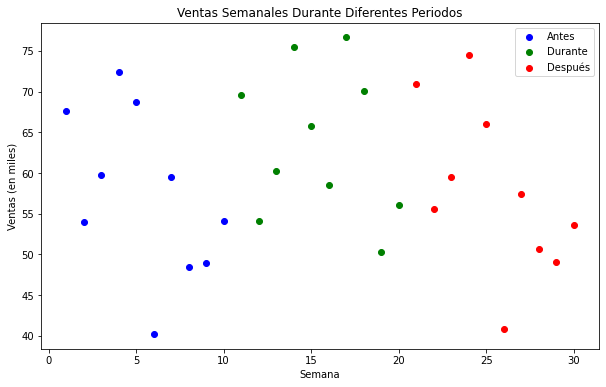

In [6]:
import matplotlib.pyplot as plt

# Gráfico de las ventas
plt.figure(figsize=(10, 6))
for periodo, color in zip(['Antes', 'Durante', 'Después'], ['blue', 'green', 'red']):
    subset = ventas[ventas['Periodo'] == periodo]
    plt.scatter(subset['Semana'], subset['Ventas'], color=color, label=periodo)

plt.title('Ventas Semanales Durante Diferentes Periodos')
plt.xlabel('Semana')
plt.ylabel('Ventas (en miles)')
plt.legend()
plt.show()


Tarea 3: Interpretación
La interpretación de los datos podría mostrar que no hay un cambio significativo en las ventas durante y después de la campaña en comparación con el periodo anterior. Sin embargo, hay un pico durante la festividad, lo que podría llevar a la conclusión errónea de que la campaña no tuvo efecto.

Discusión sobre Endogeneidad
Este es un ejemplo clásico de endogeneidad, donde un factor externo (la festividad) está afectando tanto a la variable independiente (la campaña de marketing) como a la variable dependiente (las ventas). La presencia de este factor confunde la relación causal entre la campaña y las ventas.

Podrías discutir con los estudiantes cómo, en ausencia de la festividad, quizás las ventas habrían sido más bajas durante el periodo de la campaña, lo que indicaría que la campaña efectivamente tuvo un efecto positivo. Este es el concepto del contrafactual en la inferencia causal: ¿qué habría pasado si no se hubiera llevado a cabo la campaña?

## Ejercicio 5. Impacto de la Formación en el Rendimiento de los Empleados
Imagina que eres un economista en una empresa y quieres evaluar el impacto de un programa de formación en el rendimiento de los empleados. La hipótesis es que la formación mejora el rendimiento.

Tarea 1: Simular Datos de Empleados
Primero, vamos a simular una base de datos de empleados con sus horas de formación y su rendimiento (puntuación).

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(0)

# Número de empleados
n_empleados = 100

# Horas de formación (simuladas)
horas_formacion = np.random.normal(20, 5, n_empleados)

# Rendimiento (puntuación), influenciado por las horas de formación y otros factores
rendimiento = 10 + 0.5 * horas_formacion + np.random.normal(0, 5, n_empleados)

# Crear DataFrame
datos_empleados = pd.DataFrame({
    'Horas_Formacion': horas_formacion,
    'Rendimiento': rendimiento
})

Tarea 2: Análisis de Regresión Lineal con Statsmodels
Ahora, realizamos una regresión lineal utilizando statsmodels.

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     35.58
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           3.89e-08
Time:                        22:11:27   Log-Likelihood:                -305.62
No. Observations:                 100   AIC:                             615.2
Df Residuals:                      98   BIC:                             620.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.0818      2.155     

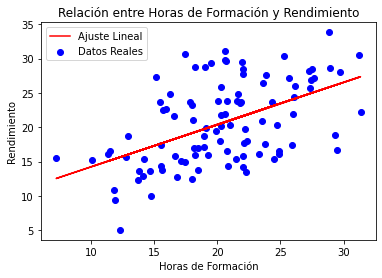

In [8]:
# Añadir una constante al modelo (intercepto)
X = sm.add_constant(datos_empleados['Horas_Formacion'])
y = datos_empleados['Rendimiento']

# Crear y ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

# Realizar predicciones
predicciones = modelo.predict(X)

# Graficar los resultados
plt.scatter(datos_empleados['Horas_Formacion'], datos_empleados['Rendimiento'], color='blue', label='Datos Reales')
plt.plot(datos_empleados['Horas_Formacion'], predicciones, color='red', label='Ajuste Lineal')
plt.title('Relación entre Horas de Formación y Rendimiento')
plt.xlabel('Horas de Formación')
plt.ylabel('Rendimiento')
plt.legend()
plt.show()


Tarea 3: Interpretación y Discusión
El resumen del modelo proporcionado por statsmodels incluye una gran cantidad de información estadística, incluyendo el coeficiente para las horas de formación (la pendiente de la regresión), el intercepto, el valor p, el R-cuadrado, entre otros. Estos resultados nos ayudan a interpretar la relación entre las horas de formación y el rendimiento de los empleados.

Discusión sobre Álgebra Lineal en Econometría
Este ejercicio, utilizando statsmodels, demuestra cómo el álgebra lineal es esencial en econometría para estimar los parámetros de los modelos lineales. La regresión lineal, en su núcleo, resuelve un sistema de ecuaciones lineales para encontrar los coeficientes que minimizan el error cuadrático. statsmodels facilita este proceso y proporciona herramientas adicionales para la interpretación estadística.